# Exploratory Data Analysis (EDA) of National Drug Seizures FY 21-24

### Devarsh Vanditkumar Joshi(100906815)
Drug trafficking poses a grave threat to public safety and national security. Analyzing drug seizure data provides an opportunity to identify geographical patterns, understand trafficking methods, and evaluate the effectiveness of law enforcement. This project delves into the Nationwide Drug Seizures dataset to extract actionable insights and inform strategies for combating this menace.  


--- 

## Objectives  

1. **Identify Regional Trends**:
   - Pinpoint regions with heightened drug-related activity.  
   - Determine the most prevalent drug categories within these regions.  
   
2. **Examine Temporal Patterns**:
   - Analyze seasonal and annual trends in drug seizure incidents and quantities.  
   - Identify peak periods of activity to refine enforcement approaches.  

3. **Evaluate Trafficking Methods**:  
   - Investigate seizure patterns based on trafficking modes, including land, air, and sea.  

---

## Approach  

Using Python-based data analysis tools, this project will examine the dataset through:  
- **Data Cleaning**: Ensuring the dataset is free from inconsistencies and missing values for accurate analysis.  
- **Visualizations**: Employing advanced visualizations to uncover patterns.  

This project aims to equip law enforcement and policymakers with actionable insights to combat drug trafficking effectively. Through detailed EDA, we strive to bridge the gap between raw data and strategic decisions.  


---

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
import numpy as np


plt.style.use('dark_background')
# Load the dataset
data = pd.read_csv('nationwide-drugs-fy21-fy24.csv')

# Data Cleaning
data.rename(columns={'Sum Qty (lbs)': 'Weight (lbs)'}, inplace=True)
# data.drop(columns=['FY'], inplace=True)
data['Land Filter'] = data['Land Filter'].str.strip().str.upper()

data.head()


,FY,Month (abbv),Component,Region,Land Filter,Area of Responsibility,Drug Type,Count of Event,Weight (lbs)
0,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,ATLANTA FIELD OFFICE,Cocaine,1,19.224309
1,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,ATLANTA FIELD OFFICE,Khat (Catha Edulis),2,4.416741
2,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,ATLANTA FIELD OFFICE,Marijuana,12,161.359636
3,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,ATLANTA FIELD OFFICE,Other Drugs**,4,6.020383
4,2024,APR,Office of Field Operations,Coastal/Interior,OTHER,BALTIMORE FIELD OFFICE,Cocaine,2,9.237369


---

## Dataset Description

The dataset includes detailed information about drug seizures across various regions in the United States. Key attributes of the dataset are as follows:

- **Region**: The geographical area where the event occurred (e.g., Coastal/Interior, Southwest Border).
- **Drug Type**: The type of drug involved in the seizure (e.g., Marijuana, Methamphetamine, Fentanyl).
- **Count of Event**: The number of incidents or seizures recorded for a specific drug type.
- **Sum Qty (lbs)**: The total weight of drugs seized, measured in pounds.
- **Land Filter**: Indicates the mode of trafficking (e.g., Land, Air, Sea).
- **Component**: The enforcement agency responsible for the seizure (e.g., Office of Field Operations).

### Observations:
- The dataset spans multiple years and includes detailed records, enabling temporal and regional analyses.
- Drug types show significant variation in quantity and frequency across regions.
- The dataset provides a strong foundation for understanding trafficking patterns and enforcement effectiveness.


---

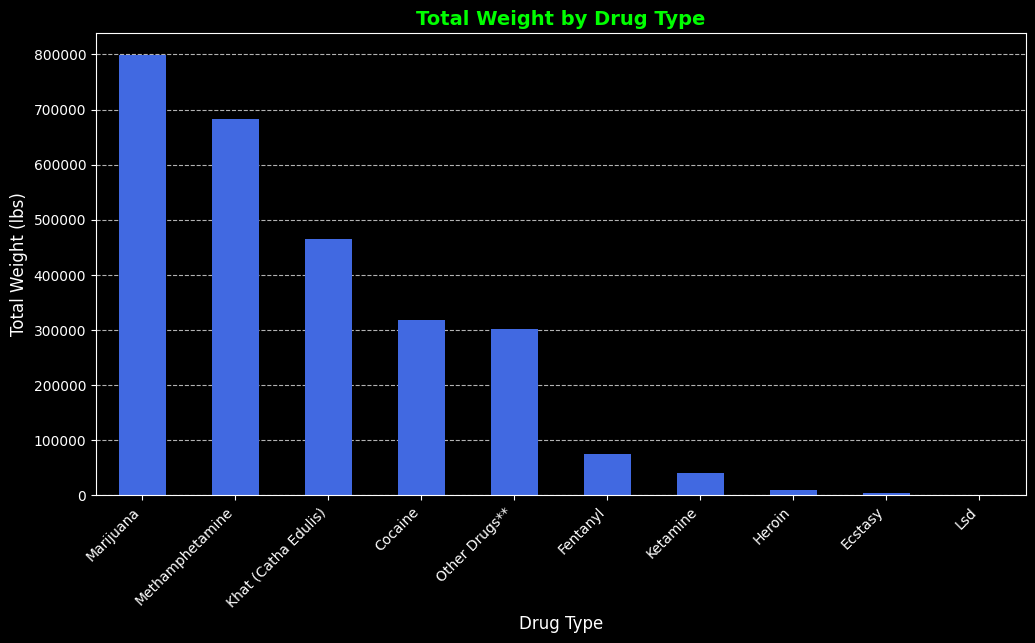

In [2]:

# Total Weight by Drug Type
total_weight_by_drug = data.groupby('Drug Type')['Weight (lbs)'].sum()

# Plotting
plt.figure(figsize=(12, 6))
total_weight_by_drug.sort_values(ascending=False).plot(kind='bar', color='royalblue', zorder=2)
plt.title('Total Weight by Drug Type', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Drug Type', fontsize=12)
plt.ylabel('Total Weight (lbs)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
plt.show()


---

## Total Weight by Drug Type

The bar chart above illustrates the total weight of different drug types seized, measured in pounds. The analysis reveals the following key insights:

- **Questions Addressed**:
  - Which drugs are most prevalent by weight?
  - How does the distribution of synthetic drugs compare to traditional ones?

1. **Marijuana** dominates the dataset, accounting for the highest weight among all drug types, far exceeding others.
2. **Methamphetamine** and **Khat (Catha Edulis)** also contribute significantly to the total weight, indicating their prevalence in drug trafficking activities.
3. **Cocaine** follows as another prominent drug type, although its total weight is considerably lower than the top three.
4. Other drugs, including **Fentanyl**, **Ketamine**, and **Heroin**, have much lower quantities in comparison but are still critical due to their potency and impact.

### Observations:
- Marijuana's overwhelming dominance highlights its widespread nature in trafficking and seizures.
- The presence of synthetic drugs like Methamphetamine and Fentanyl indicates the evolving nature of drug production and distribution.

This visualization helps prioritize law enforcement efforts by focusing on the most seized drug types and their respective quantities.


---

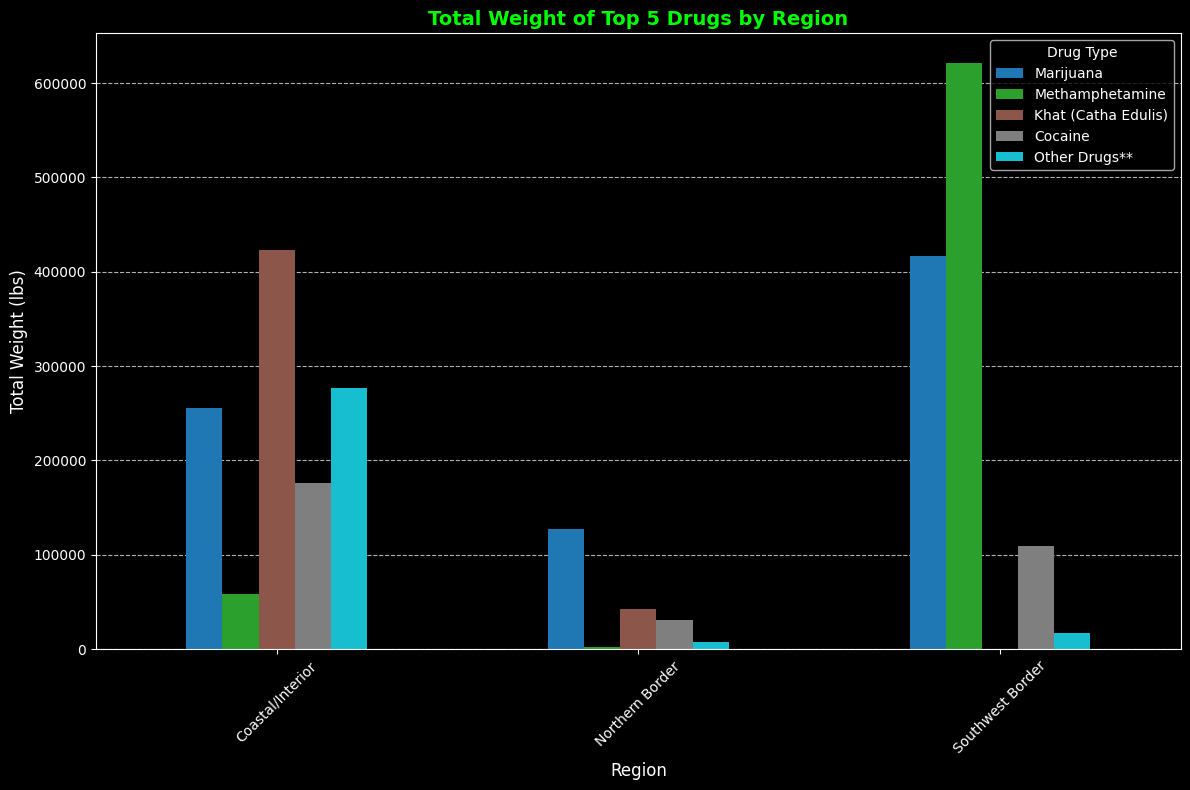

In [3]:

# Regional Trends for Top 5 Drugs
top_5_drugs = total_weight_by_drug.nlargest(5).index
region_drug_trends = data.groupby(['Region', 'Drug Type'])['Weight (lbs)'].sum().unstack()

region_drug_trends_top5 = region_drug_trends[top_5_drugs]

# Plotting
region_drug_trends_top5.plot(kind='bar', figsize=(14, 8), colormap='tab10', zorder=2)
plt.title('Total Weight of Top 5 Drugs by Region', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Weight (lbs)', fontsize=12)
plt.legend(title='Drug Type', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
plt.show()


---

## Regional Trends for Top 5 Drugs

The bar chart above illustrates the total weight (in pounds) of the top 5 drugs seized across different regions. Each bar represents a drug type within a specific region, providing insights into the geographical distribution of drug seizures.

### Key Observations:
1. **Coastal/Interior Region**:
   - This region shows the highest total weight across all drug types, with **Khat (Catha Edulis)** and **Cocaine** contributing significantly.
   - Marijuana also forms a substantial part of the seizures in this region.

2. **Northern Border**:
   - Marijuana dominates the seizures in this region, with relatively smaller contributions from other drug types.

3. **Southwest Border**:
   - **Methamphetamine** leads the drug seizures in this region, followed by Marijuana.
   - Other drugs such as Cocaine and Khat are less prominent here.

### Insights:
- The **Coastal/Interior** region has a diverse and high-volume distribution of drug types, indicating it as a critical area for trafficking activities.
- **Methamphetamine** dominates in the **Southwest Border**, suggesting a focus on synthetic drug trafficking in this area.
- **Marijuana** remains a consistent and significant contributor across all regions.

This analysis highlights the varying nature of drug trafficking across different regions, providing valuable guidance for targeted enforcement strategies.



---

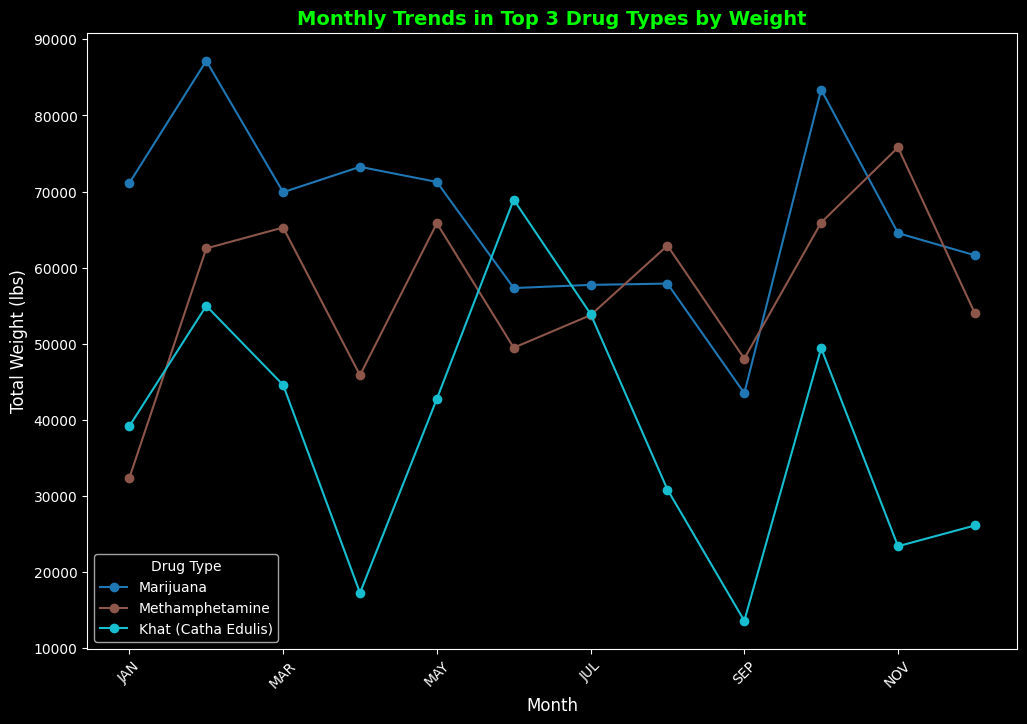

In [4]:

# Monthly Trends in Top 5 Drug Types by Weight

top_3_drugs = total_weight_by_drug.nlargest(3).index
region_drug_trends = data.groupby(['Region', 'Drug Type'])['Weight (lbs)'].sum().unstack()

month_order = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
drug_trends = data.groupby(['Month (abbv)', 'Drug Type'])['Weight (lbs)'].sum().unstack()
drug_trends = drug_trends.reindex(month_order)

# Plotting
drug_trends[top_3_drugs].plot(figsize=(12, 8), marker='o', colormap='tab10')
plt.title('Monthly Trends in Top 3 Drug Types by Weight', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Weight (lbs)', fontsize=12)
plt.legend(title='Drug Type', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.0)
plt.xticks(rotation=45)
plt.show()



---

## Monthly Trends in Top 3 Drug Types by Weight

The line chart above displays the monthly trends in the total weight (in pounds) of the top 3 drug types seized. This visualization helps in understanding the temporal patterns for the most significant drug types.

### Key Observations:
1. **Marijuana**:
   - Consistently shows high weights throughout the year, with noticeable peaks in specific months.
   - Suggests consistent trafficking activity with periodic spikes.

2. **Methamphetamine**:
   - Exhibits more fluctuation compared to Marijuana, with significant peaks and drops across the months.
   - Indicates seasonality or specific operational patterns in trafficking.

3. **Khat (Catha Edulis)**:
   - Displays irregular patterns with occasional spikes, suggesting sporadic trafficking events rather than steady activity.

### Insights:
- The temporal trends highlight the need for region-specific and time-sensitive enforcement measures.
- Spikes in specific months can help law enforcement focus their resources during high-activity periods for certain drugs.
- The fluctuation in Methamphetamine and Khat activities may correspond to changes in supply chains or enforcement effectiveness.

This visualization provides critical input for analyzing seasonality and planning interventions for drug trafficking control.


---

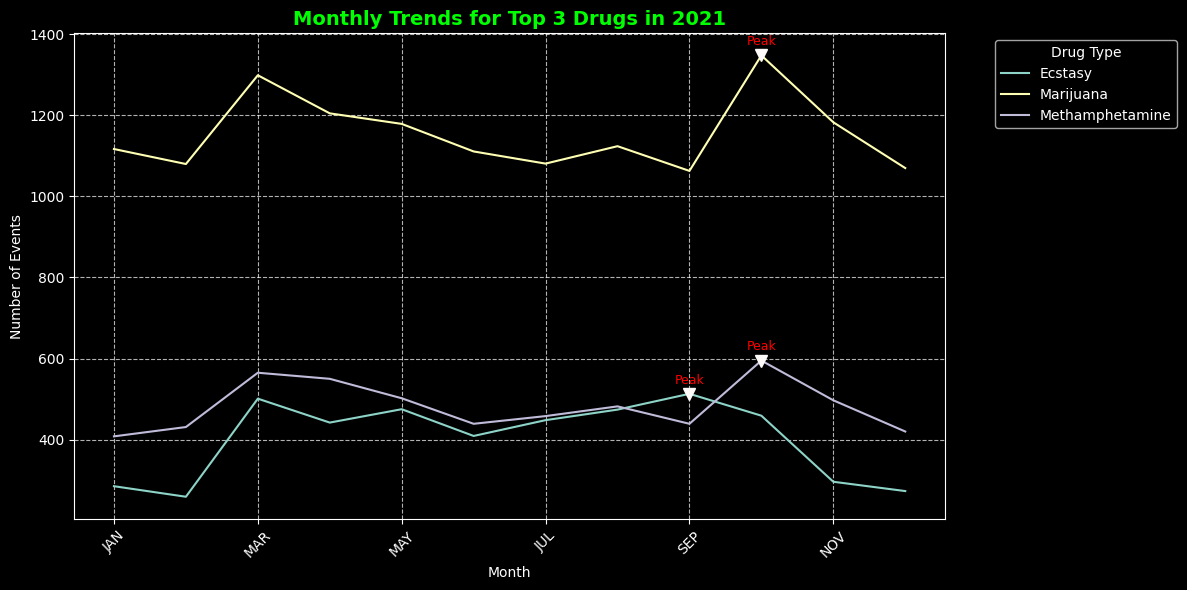

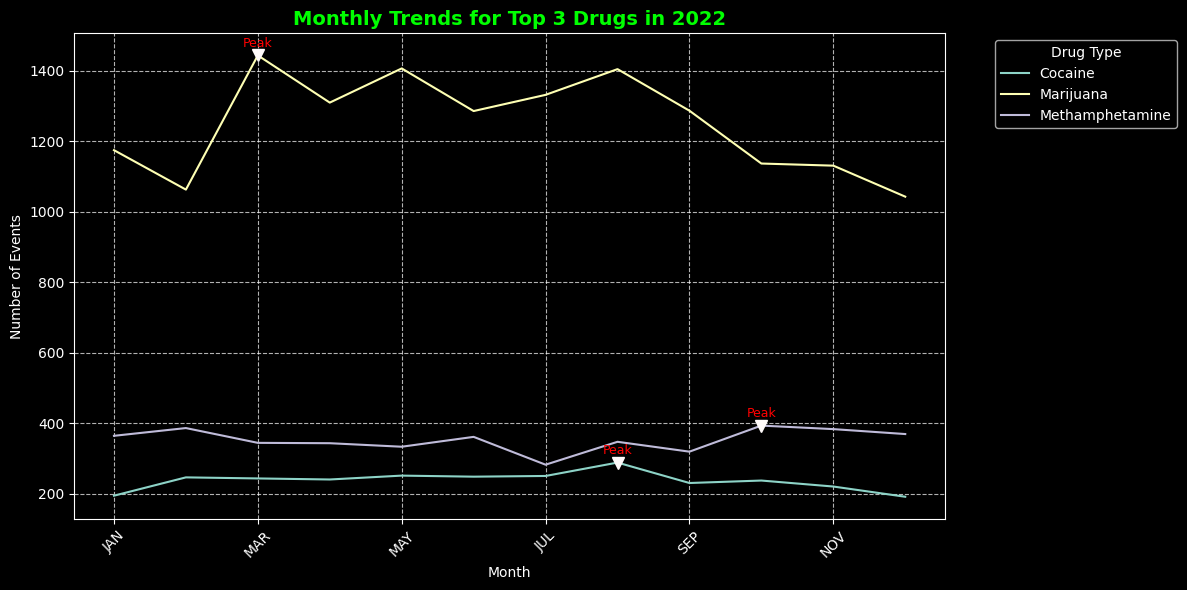

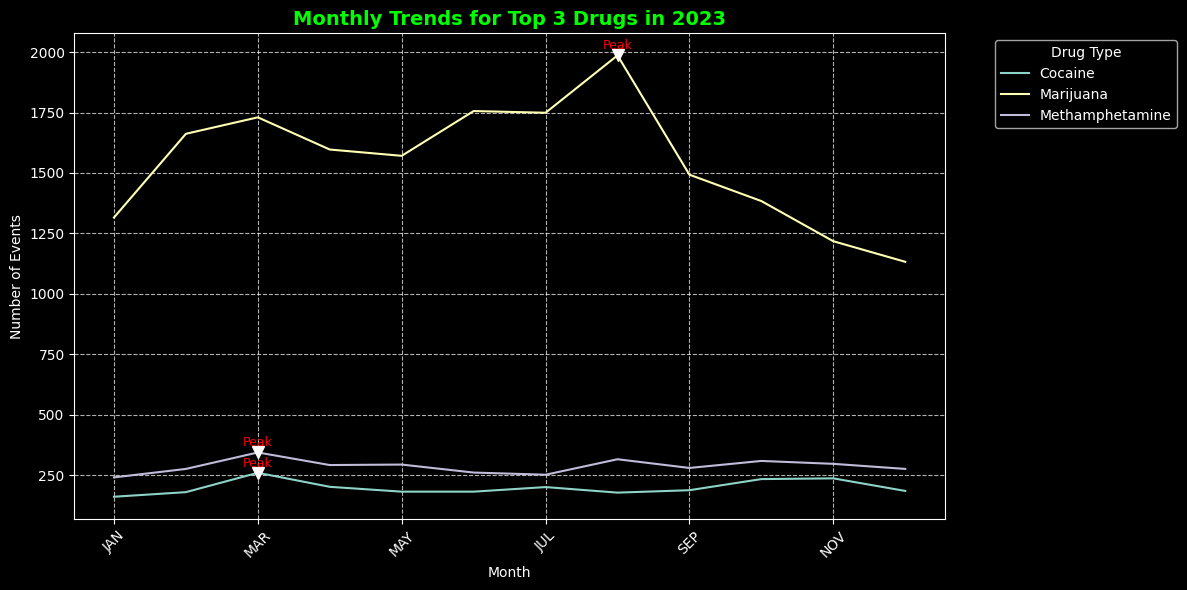

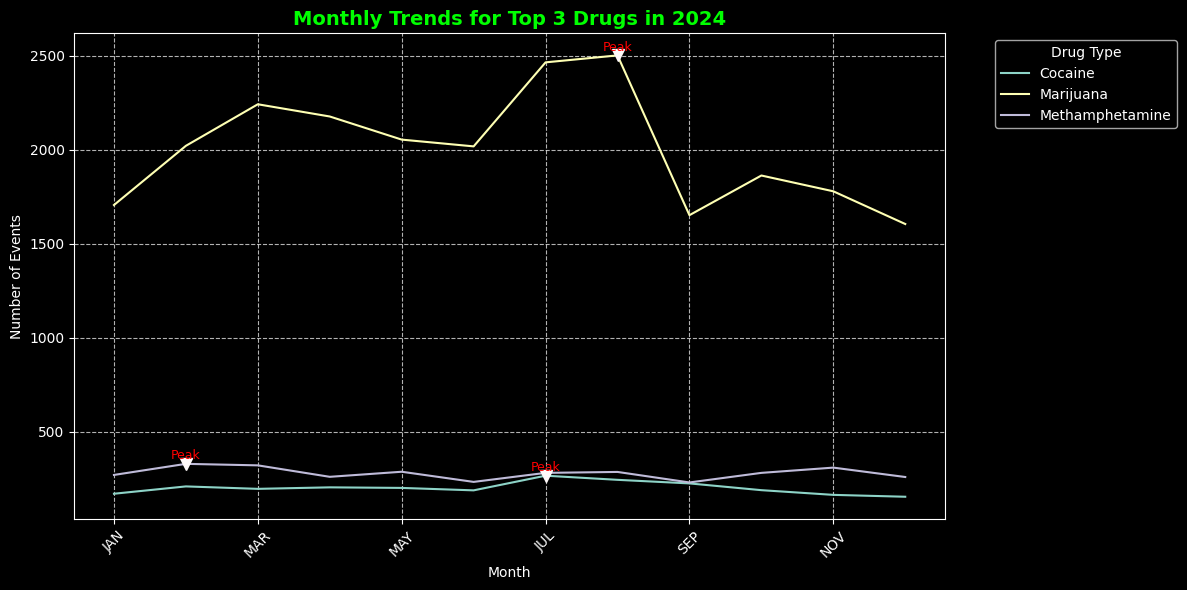

In [5]:
# Monthly Trends in Top 3 Drug Types by Events per year

filtered_data_no_other = data[data['Drug Type'] != 'Other Drugs**']
top_3_drugs_per_year = (
    filtered_data_no_other.groupby(['FY', 'Drug Type'])['Count of Event']
    .sum()
    .reset_index()
    .sort_values(by=['FY', 'Count of Event'], ascending=[True, False])
)

# Create a dictionary of top 3 drugs per year
top_3_per_year = (
    top_3_drugs_per_year.groupby('FY')['Drug Type']
    .apply(lambda x: x.head(3).tolist())
    .to_dict()
)

# Generate plots for each year
unique_years = sorted(filtered_data_no_other['FY'].unique())

for year in unique_years:
    # Filter data for the year and top 3 drugs
    year_top_3_drugs = top_3_per_year[year]
    year_data = filtered_data_no_other[
        (filtered_data_no_other['FY'] == year) & (filtered_data_no_other['Drug Type'].isin(year_top_3_drugs))
    ]

    # Aggregating monthly data for the top 3 drugs
    monthly_data = year_data.groupby(['Month (abbv)', 'Drug Type'])['Count of Event'].sum().reset_index()

    # Pivot data for plotting
    monthly_pivot = monthly_data.pivot_table(
        index='Month (abbv)', columns='Drug Type', values='Count of Event', fill_value=0
    )

    # Sorting months for proper order
    monthly_pivot = monthly_pivot.reindex(month_order)


    # Plotting the data
    ax = monthly_pivot.plot(kind='line', figsize=(12, 6), zorder=2)
    
    for drug in year_top_3_drugs:
        if drug in monthly_pivot.columns:
            peak_month = monthly_pivot[drug].idxmax()  # Month of the peak
            peak_value = monthly_pivot[drug].max()  # Peak value
            peak_index = month_order.index(peak_month)  # X-axis position
            ax.plot(peak_index, peak_value, marker='v', color='snow', markersize=8)  # Add marker
            ax.text(
                peak_index, peak_value + 25, 'Peak', fontsize=9, color='red', ha='center'
            )


    plt.title(f'Monthly Trends for Top 3 Drugs in {year}', fontsize=14, fontweight='bold', color='lime')
    plt.xlabel('Month')
    plt.ylabel('Number of Events')
    plt.xticks(rotation=45)
    plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
    plt.grid(axis='x', linestyle='--', alpha=0.7, zorder=1)

    plt.show()


---

## Monthly Trends in Top 3 Drug Types by Events per Year

This visualization analyzes the monthly trends in the top 3 drug types for each year based on the number of events. The chart displays separate lines for each drug type, showing how their activity fluctuates over the months.

### Key Features of the Analysis:
1. **Filtering Top 3 Drugs**:
   - For each year, the dataset filters out the top 3 drug types with the highest number of events, excluding "Other Drugs" to focus on more specific trends.

2. **Monthly Aggregation**:
   - For the selected top drug types, monthly event counts are aggregated to highlight temporal patterns.

3. **Peak Annotation**:
   - The peak month for each drug type is marked with a triangle (`^`) and annotated with the word "Peak" to make significant activity periods more apparent.

### Insights:
1. The trends reveal seasonal variations in the activity of certain drug types. Peaks often suggest times of heightened trafficking or enforcement activities.
2. Each year demonstrates distinct patterns for the dominant drug types, indicating potential shifts in trafficking trends or enforcement priorities.
3. Drugs like **Methamphetamine** and **Cocaine** exhibit fluctuating patterns, while others maintain more consistent levels of activity.

### Observations:
- Annotating peaks allows enforcement agencies to focus on months with the highest activity for specific drug types.
- Comparing trends across years helps identify long-term changes in trafficking behaviors.

This analysis provides a valuable temporal perspective, supporting strategic planning and resource allocation in combating drug trafficking.


---

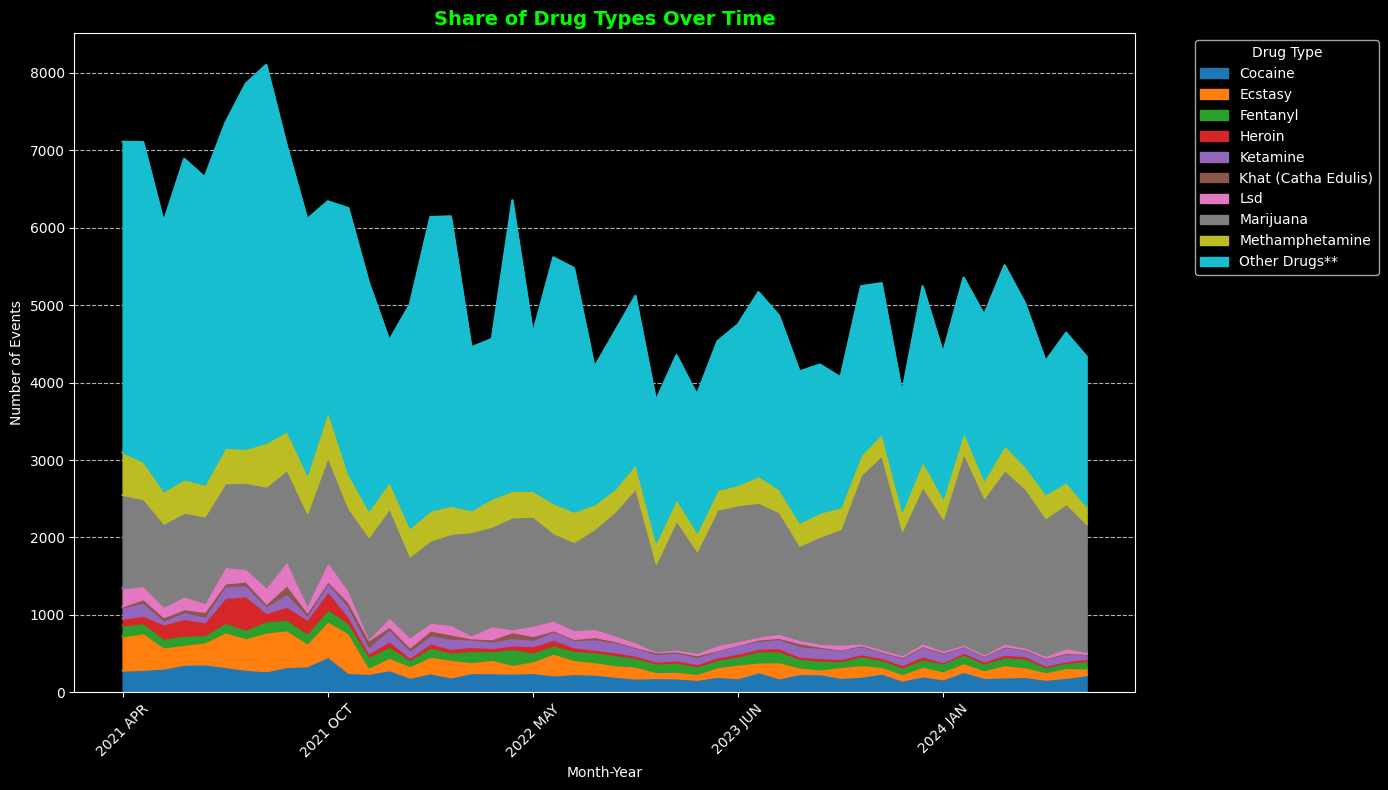

In [6]:
#Share of Each Drug Types over Time


#Preparing data
time_series = data.groupby(['FY', 'Month (abbv)', 'Drug Type'])[['Count of Event']].sum().reset_index()

area_chart_data = time_series.pivot_table(index=['FY', 'Month (abbv)'], columns='Drug Type', values='Count of Event', aggfunc='sum', fill_value=0).reset_index()

# Aggregating data for visualization
area_chart_data['Month-Year'] = area_chart_data['FY'].astype(str) + " " + area_chart_data['Month (abbv)']
area_chart_data = area_chart_data.drop(columns=['FY', 'Month (abbv)']).set_index('Month-Year')

# Stacked area chart
area_chart_data.plot(kind='area', figsize=(14, 8), stacked=True, colormap='tab10', zorder=2)
plt.title('Share of Drug Types Over Time', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Month-Year')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()


---

## Share of Each Drug Type Over Time

The stacked area chart above represents the share of different drug types over time, measured by the number of events in each month-year. The visualization provides insights into how the distribution of drug types has evolved over time.

### Key Features of the Chart:
1. **Temporal Representation**:
   - The x-axis shows the timeline (Month-Year), highlighting changes in drug seizure events across the period.
2. **Drug Type Contribution**:
   - Each drug type's contribution to the total events is stacked to showcase their relative share.

### Observations:
1. **Marijuana**:
   - Consistently contributes the largest share of events over time, with fluctuations indicating possible changes in trafficking activity.
2. **Other Drugs**:
   - This category forms a significant proportion of the events, highlighting the diversity of lesser-known drug types.
3. **Methamphetamine and Cocaine**:
   - These drugs show noticeable activity, with Methamphetamine maintaining a consistent presence.
4. **Emerging Trends**:
   - Drugs like **Fentanyl** and **Khat (Catha Edulis)** show sporadic but increasing trends, indicating their growing importance.

### Insights:
- The dominance of **Marijuana** suggests it remains a primary focus for enforcement efforts.
- The relative stability of certain drugs like Methamphetamine contrasts with the fluctuating presence of others, hinting at differences in supply chains or enforcement success.
- The temporal trends help in identifying months or periods with spikes, allowing for targeted interventions.

This chart provides a comprehensive view of how the focus of enforcement activities shifts across drug types over time, assisting in resource allocation and strategy development.


---

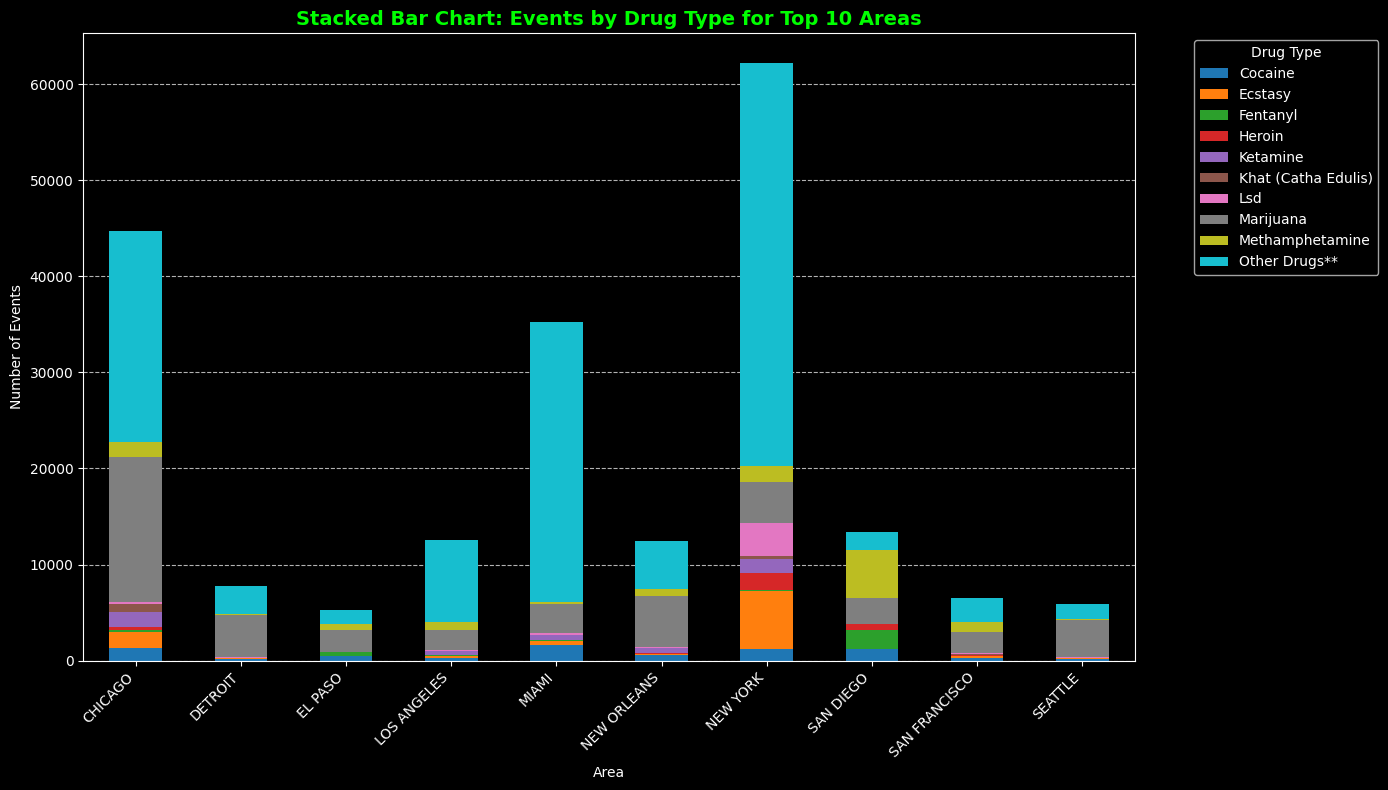

In [7]:
# Aggregating data for a treemap: Event counts by AOR and drug type
data['Area'] = data['Area of Responsibility'].str.replace(" FIELD OFFICE", "", regex=False)

treemap_data = data.groupby(['Area', 'Drug Type'])['Count of Event'].sum().reset_index()


# Constructing labels for the treemap
treemap_data['Label'] = (
    treemap_data['Area'] + "\n" + treemap_data['Drug Type'] + "\n" +
    treemap_data['Count of Event'].astype(str) + " events"
)

# Using a bar-based alternative to visualize hierarchical data since treemaps require `squarify`
top_aors = treemap_data.groupby('Area')['Count of Event'].sum().nlargest(10).index
top_aors_data = treemap_data[treemap_data['Area'].isin(top_aors)]

pivot_data = top_aors_data.pivot_table(
    index='Area', 
    columns='Drug Type', 
    values='Count of Event', 
    aggfunc='sum', 
    fill_value=0
)

# Visualizing the treemap using a bar chart alternative
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10', zorder=2)
plt.title('Stacked Bar Chart: Events by Drug Type for Top 10 Areas', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Area')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
plt.show()


---

## Stacked Bar Chart: Events by Drug Type for Top 10 Areas

The stacked bar chart above showcases the distribution of drug-related events across the top 10 areas of responsibility. Each bar represents the total number of events in a specific area, broken down by drug type.

### Key Features of the Chart:
1. **Area Representation**:
   - The x-axis represents the top 10 areas with the highest number of reported events.
   - Areas such as **New York**, **Chicago**, and **Miami** dominate the chart with significantly higher event counts.

2. **Drug Type Contribution**:
   - Each section of the bar represents a specific drug type, with its height indicating its contribution to the total event count.
   - **Marijuana**, **Methamphetamine**, and **Cocaine** are the most dominant drug types across multiple areas.

### Observations:
1. **New York**:
   - This area has the highest number of drug-related events, with a significant contribution from **Other Drugs** and **Marijuana**.
2. **Chicago and Miami**:
   - These areas also show high levels of activity, with **Methamphetamine** and **Cocaine** contributing prominently.
3. **Regional Trends**:
   - Some areas, like **San Francisco** and **Seattle**, show a more evenly distributed mix of drug types, indicating diverse trafficking patterns.

### Insights:
- The dominance of certain areas like **New York** and **Chicago** suggests these are critical hotspots for drug-related activities.
- The variation in drug type contributions across areas indicates that trafficking strategies and enforcement challenges vary geographically.
- Targeted enforcement efforts in the highlighted areas could significantly reduce the overall impact of drug trafficking.

This visualization provides actionable insights into how drug-related events are distributed geographically and by drug type, enabling more focused resource allocation.


---

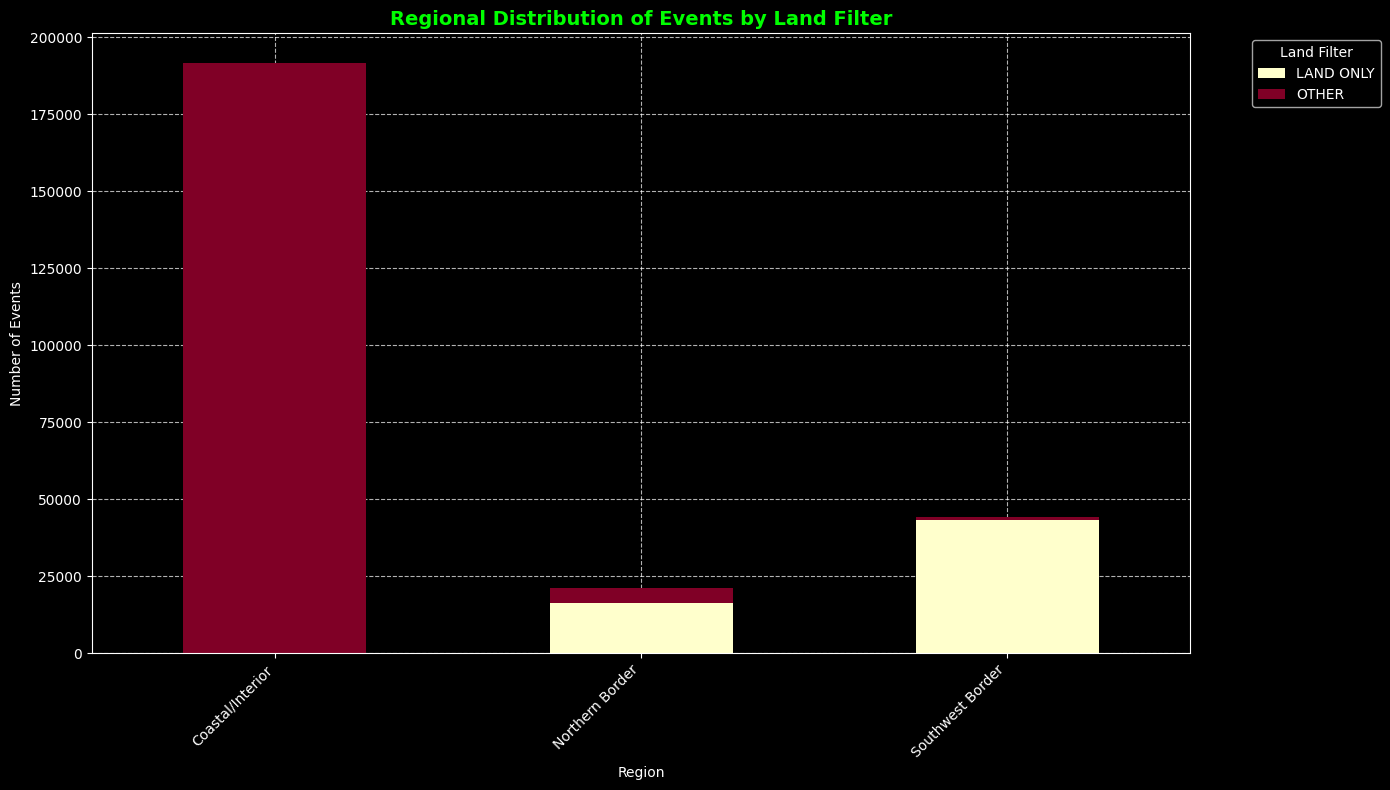

In [8]:
# Aggregating data for regional analysis with land filter
regional_land_filter = data.groupby(['Region', 'Land Filter'])['Count of Event'].sum().unstack(fill_value=0)

# Plotting a stacked bar chart for events by region and land filter
regional_land_filter.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='YlOrRd', zorder=2)
plt.title('Regional Distribution of Events by Land Filter', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Region')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Land Filter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()


---

## Regional Distribution of Events by Land Filter

The bar chart above illustrates the regional distribution of drug-related events, categorized by the **Land Filter** variable, which identifies whether the seizure occurred via land or other methods.

### Key Features:
1. **Regions**:
   - The x-axis represents the regions: **Coastal/Interior**, **Northern Border**, and **Southwest Border**.
2. **Land Filter**:
   - The events are split into two categories:
     - **LAND ONLY**: Events occurring exclusively on land.
     - **OTHER**: Events involving other modes of trafficking, such as air or sea.

### Observations:
1. **Coastal/Interior Region**:
   - This region overwhelmingly dominates the chart, with the majority of events categorized as **OTHER**.
   - Indicates significant activity involving non-land-based trafficking methods.
2. **Southwest Border**:
   - This region has the highest number of **LAND ONLY** events, suggesting land is the predominant mode of trafficking.
3. **Northern Border**:
   - Exhibits relatively low event counts compared to other regions, with a mix of both land and other modes.

### Insights:
- The **Coastal/Interior region's dominance** in "OTHER" events highlights its role as a key trafficking hub for non-land methods.
- The **Southwest Border** is heavily reliant on land routes, suggesting that enforcement efforts in this region should focus on land-based transportation methods.
- Understanding these distributions helps prioritize resources for specific regions and trafficking modes, enabling more efficient and targeted interventions.

This analysis provides a regional breakdown of trafficking methods, aiding in the development of tailored enforcement strategies.


---

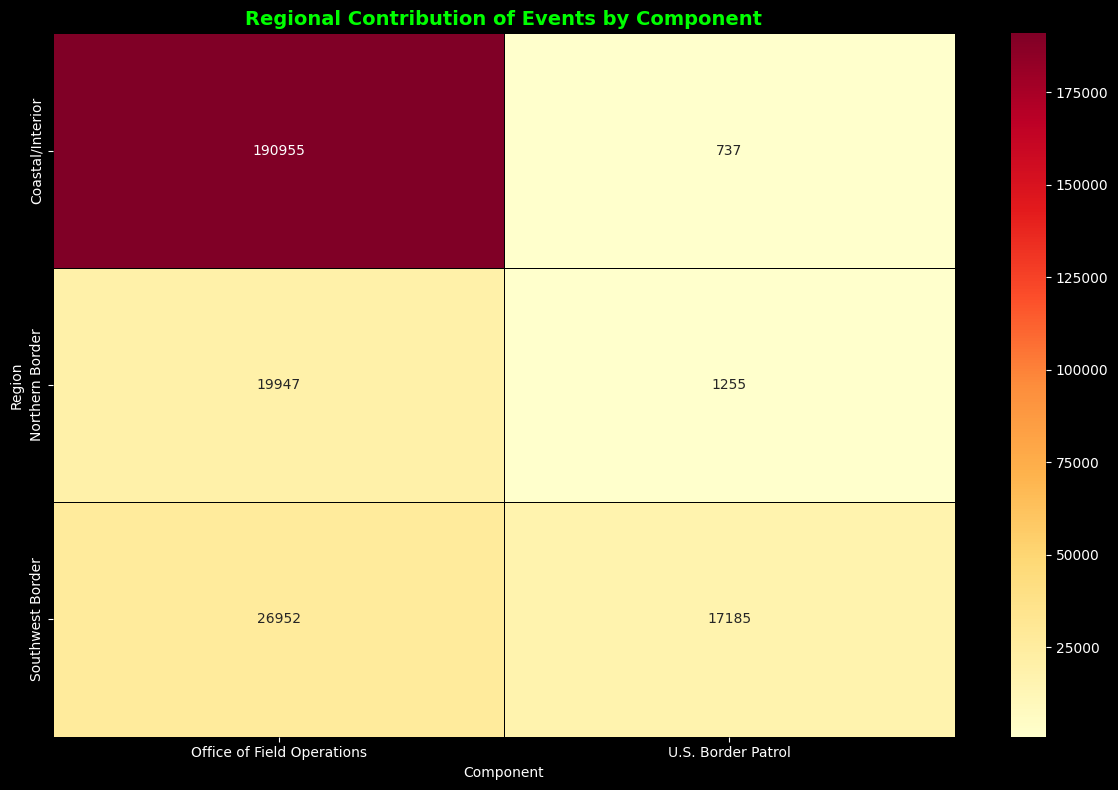

In [9]:
# Aggregating data for regional contribution by component
regional_component_data = data.groupby(['Region', 'Component'])['Count of Event'].sum().unstack(fill_value=0)

# Plotting a heatmap for regional contributions by component
plt.figure(figsize=(12, 8))
sns.heatmap(regional_component_data, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5, linecolor='black')
plt.title('Regional Contribution of Events by Component', fontsize=14, fontweight='bold', color='lime')
plt.xlabel('Component')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


---

## Regional Contribution of Events by Component

The heatmap above visualizes the contribution of different components to drug-related events across various regions. The **Office of Field Operations** and **U.S. Border Patrol** are the two primary components contributing to the event counts.

### Key Features:
1. **Regions**:
   - The y-axis represents the regions: **Coastal/Interior**, **Northern Border**, and **Southwest Border**.
2. **Components**:
   - The x-axis represents the components responsible for these events:
     - **Office of Field Operations**
     - **U.S. Border Patrol**
3. **Heatmap Intensity**:
   - The color intensity indicates the volume of events, with darker shades representing higher counts.

### Observations:
1. **Coastal/Interior Region**:
   - The **Office of Field Operations** dominates, contributing the highest number of events (190,955), with minimal input from the **U.S. Border Patrol**.
2. **Southwest Border**:
   - Both components contribute significantly, though the **Office of Field Operations** maintains a higher share.
3. **Northern Border**:
   - The event count is relatively low compared to other regions, with a marginal contribution from the **U.S. Border Patrol**.

### Insights:
- The **Office of Field Operations** is the primary contributor across all regions, highlighting its critical role in enforcement activities.
- The **Southwest Border** sees a more balanced contribution from both components, suggesting varied enforcement strategies.
- The **Coastal/Interior region's** reliance on the **Office of Field Operations** suggests a focus on specific types of trafficking activities.

This visualization emphasizes the importance of components in regional enforcement strategies, enabling better resource allocation and planning.


---

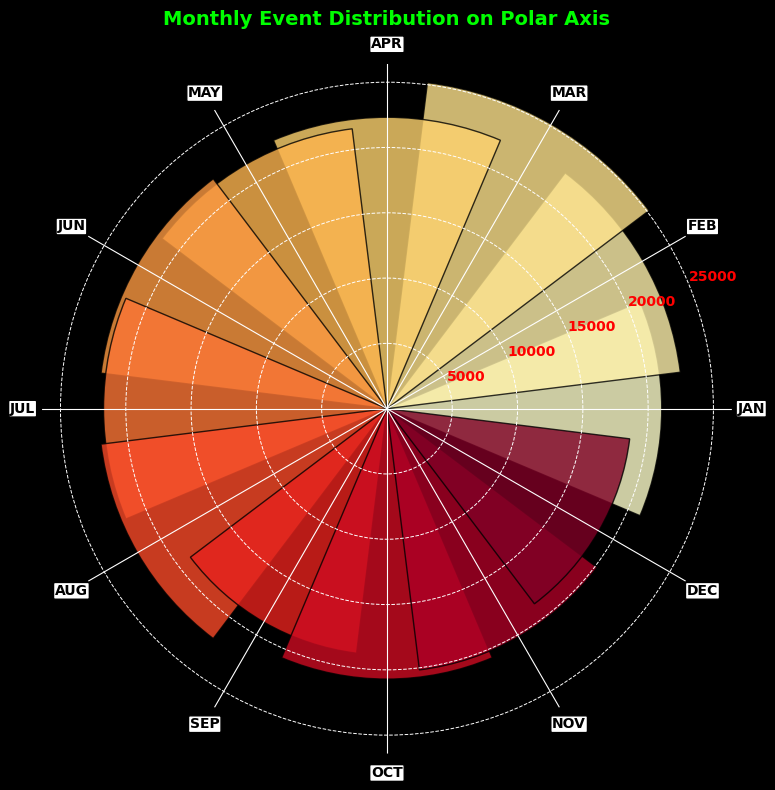

In [10]:
# Preparing data for a polar bar chart
monthly_events = data.groupby('Month (abbv)')['Count of Event'].sum().reindex(month_order)

# Converting month abbreviations to radians for polar plotting
angles = np.linspace(0, 2 * np.pi, len(month_order), endpoint=False).tolist()

# Plotting the bar chart on polar axis
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Creating bars with a gradient colormap
bars = ax.bar(
    angles, monthly_events, align='center', alpha=0.8, edgecolor="black",
    color=plt.cm.YlOrRd(np.linspace(0, 1, len(month_order)))
)
# Enhancing aesthetics
ax.set_xticks(angles)
ax.set_xticklabels(month_order, fontsize=10, fontweight='bold')
ax.yaxis.grid(color='white', linestyle='--', linewidth=0.7)
ax.spines['polar'].set_visible(False)
ax.tick_params(axis='y', colors='red')
ax.tick_params(axis='x', colors='black')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    
    
for label in ax.get_xticklabels():
    label.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1'))
    



# Adding a title and enhancing the layout
plt.title('Monthly Event Distribution on Polar Axis', va='bottom', fontsize=14, fontweight='bold', color='lime')
plt.tight_layout()
plt.show()



---

## Monthly Event Distribution on Polar Axis

The polar bar chart above visualizes the distribution of drug-related events across months, providing a unique perspective on temporal trends.

### Key Features:
1. **Polar Layout**:
   - The months are arranged in a circular fashion, creating a radial visualization of event distribution.
   - This layout highlights seasonal trends effectively.

2. **Gradient Coloring**:
   - The bars are color-coded using a gradient to indicate event intensity, with darker shades representing higher counts.

3. **Annotations**:
   - Event counts are marked on the bars to emphasize the magnitude of activity for each month.

### Observations:
1. **Peak Months**:
   - The highest activity is observed in **January**, as indicated by the longest and darkest bar.
2. **Seasonal Trends**:
   - Activity gradually reduces in the summer months (**June–August**) and picks up towards the end of the year (**November–December**).
3. **Even Distribution**:
   - Although some months like **January** and **February** stand out, there is a relatively even spread of events throughout the year, indicating consistent trafficking activity.

### Insights:
- The polar chart provides a clear visual representation of temporal trends, making it easy to identify seasonal peaks and troughs.
- Enforcement agencies can use this insight to allocate resources more effectively during high-activity months, especially at the start and end of the year.
- The consistent activity suggests that trafficking is a year-round issue, requiring continuous monitoring.

This visualization offers a dynamic and intuitive way to interpret monthly data, adding depth to the temporal analysis of drug-related events.


---

In [11]:

# Summary Statistics
summary_stats = data.describe()
summary_stats


,FY,Count of Event,Weight (lbs)
count,9866.000000,9866.000000,9866.000000
mean,2022.485100,26.052199,272.837338
std,1.126032,97.777970,1192.413999
min,2021.000000,1.000000,0.000000
25%,2021.000000,1.000000,0.117336
50%,2022.000000,5.000000,5.006103
75%,2024.000000,17.000000,81.681804
max,2024.000000,1925.000000,27884.986666


---

# Conclusion

This project successfully conducted an in-depth Exploratory Data Analysis (EDA) on the Nationwide Drug Seizures dataset, uncovering key patterns, trends, and insights. The analysis focused on regional, temporal, and categorical distributions of drug-related events, providing valuable inputs for enforcement and policymaking.

### Summary of Key Findings:
1. **Regional Insights**:
   - The **Coastal/Interior Region** consistently recorded the highest number of drug-related events, largely dominated by non-land-based trafficking methods.
   - The **Southwest Border** showed significant land-based activity, highlighting its role in land trafficking.

2. **Drug Type Trends**:
   - **Marijuana** emerged as the most frequently seized drug across all regions and time periods.
   - Synthetic drugs like **Methamphetamine** and emerging substances like **Fentanyl** demonstrated fluctuating but growing trends, indicating evolving trafficking dynamics.

3. **Temporal Analysis**:
   - Seasonal trends were evident, with peak activity observed in **January** and a decline during the summer months.
   - The consistency of events across most months suggests that trafficking is not limited to specific periods but requires year-round enforcement efforts.

4. **Land and Component Contribution**:
   - The **Office of Field Operations** played a dominant role in enforcement activities across all regions, with the **U.S. Border Patrol** contributing significantly at the **Southwest Border**.
   - Regional variations in trafficking modes were clearly highlighted, aiding in understanding the operational challenges faced by different enforcement agencies.

---

### Actionable Insights:
- **Policy and Enforcement**:
  - Focused interventions in regions like **Coastal/Interior** and **Southwest Border** can significantly impact trafficking activities.
  - Tailored enforcement strategies for high-activity months (e.g., January and November) can enhance resource efficiency.

- **Emerging Drug Threats**:
  - Increasing activity of synthetic drugs like Methamphetamine and Fentanyl calls for enhanced monitoring and preventive measures.
  - Understanding shifts in drug type trends can help anticipate and address future trafficking patterns.

---

### Reflections and Next Steps:
This analysis highlighted the power of data-driven approaches in understanding and combating drug trafficking. However, there are opportunities for further exploration:
1. **Predictive Analytics**:
   - Incorporating machine learning models to predict future trends in drug activity based on historical data.
2. **Geospatial Analysis**:
   - Adding a geospatial layer to the dataset to visualize and analyze trafficking routes and hotspots more effectively.
3. **Integration with External Datasets**:
   - Combining this dataset with socioeconomic or law enforcement data to uncover deeper insights into the factors driving trafficking activities.

---

### Final Remarks:
This project demonstrated how visualizations and statistical analysis can transform raw data into actionable insights. By leveraging these findings, stakeholders can develop more targeted strategies to combat drug trafficking, ultimately contributing to public safety and national security.

The insights provided here lay a strong foundation for more advanced analyses and collaborative efforts to tackle this pressing issue.
